## Linear regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
def plot_fit_residual(x, y, yp):
    _, axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].plot(x.ravel(), y.ravel(), "k.",  label="Podatki")
    axes[0].plot(x.ravel(), yp.ravel(), "r-", label="Model h(x)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend()

    r = pearsonr(y.ravel(), y.ravel()-yp.ravel())[0]
    axes[1].plot(y.ravel(), y.ravel()-yp.ravel(), "k.", label="Ostanek")
    axes[1].set_xlabel("y")
    axes[1].set_ylabel("y-h(x)")
    axes[1].set_title("Graf ostankov, R=%.3f" % r)
    axes[1].legend()
    plt.show()

In [3]:
def plot_coefficients(coef):
    coef=coef.ravel()
    D = len(coef)
    plt.title("Parametri modela")
    plt.bar(np.arange(D), coef)
    plt.xticks(np.arange(D))
    plt.ylabel("beta")
    plt.xlabel("d")
    plt.show()

##### Answer 6-1-1

In [4]:
data = np.loadtxt("../data/sintetični/data_B.txt")
x    = data[:, [0]]
y    = data[:, [1]]

model = LinearRegression()
model.fit(x, y)
hx = model.predict(x)

r2 = r2_score(y, hx)*100
print("R² LR: %.2f" % r2 + "%" )

X = np.zeros((len(x), 2))
X[:, 0] = x.ravel()
X[:, 1] = x.ravel()**2       

model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

r2 = r2_score(y, hx)*100
print("R² PM: %.2f" % r2 + "%" )

R² LR: 57.23%
R² PM: 90.45%


##### Answer 6-1-2

In [5]:
D = 20
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

r2 = r2_score(y, hx)*100
print("R² PM: %.2f" % r2 + "%" )

R² PM: 92.24%


##### Answer 6-1-3

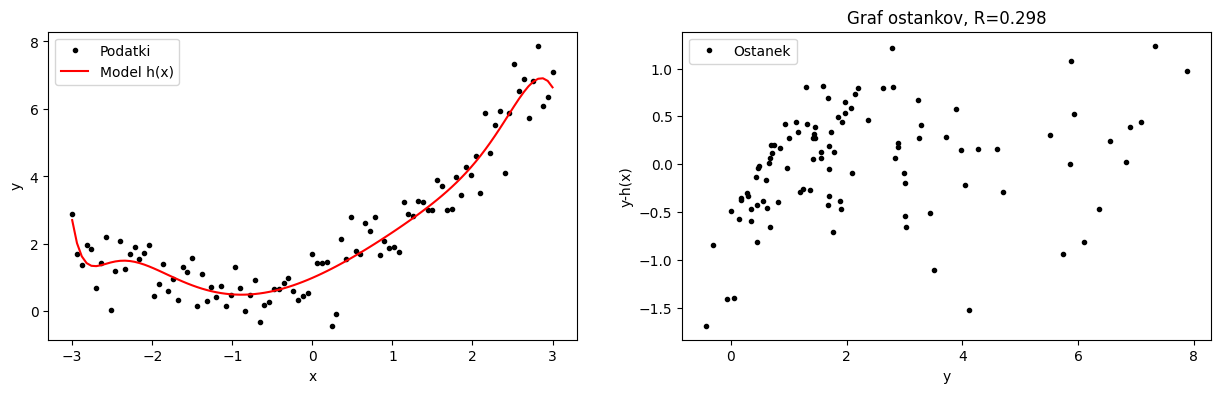

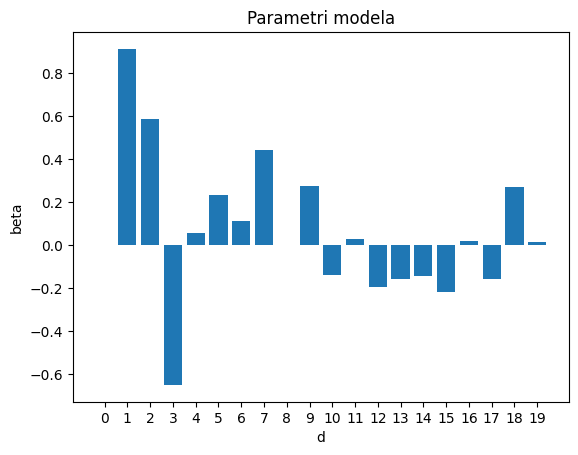

array([[ 0.00000000e+00,  9.13802656e-01,  5.85906807e-01,
        -6.49308864e-01,  5.88278033e-02,  2.34525620e-01,
         1.11064721e-01,  4.43934641e-01,  4.63456428e-04,
         2.76224505e-01, -1.37237766e-01,  2.78300466e-02,
        -1.96073991e-01, -1.54713312e-01, -1.43170096e-01,
        -2.17896095e-01,  1.81441460e-02, -1.56226931e-01,
         2.73041708e-01,  1.43194478e-02]])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

model = Ridge(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

X = scaler_x.inverse_transform(X)
y = scaler_y.inverse_transform(y)
hx = scaler_y.inverse_transform(hx.reshape(-1, 1))

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)
model.coef_

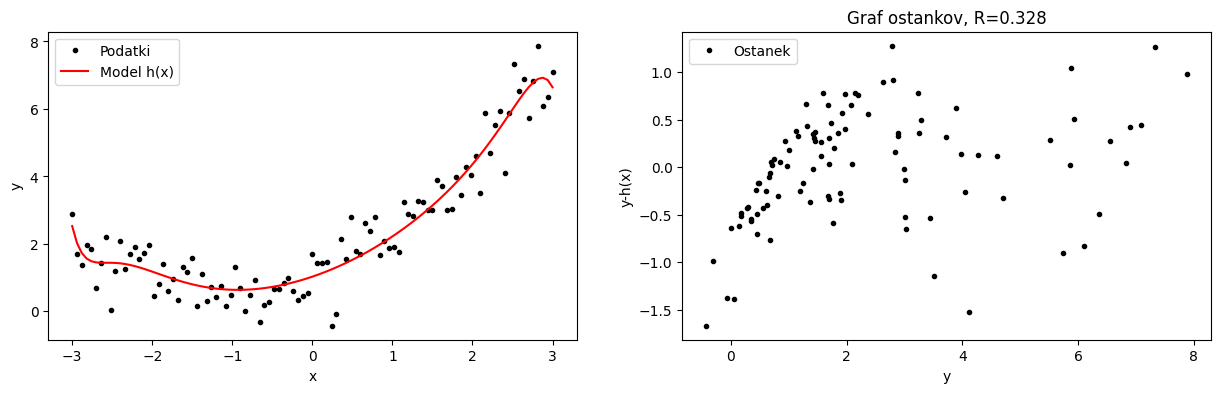

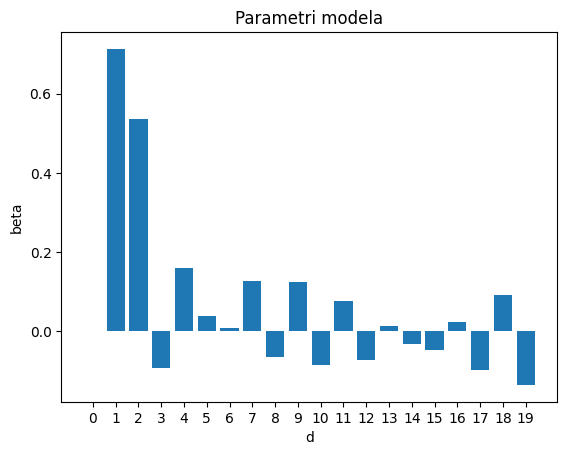

array([[ 0.        ,  0.71305552,  0.53609728, -0.09247178,  0.15894451,
         0.03960597,  0.00764063,  0.12676818, -0.06397427,  0.12520119,
        -0.08618752,  0.07690239, -0.07261274,  0.0138633 , -0.03347035,
        -0.04670695,  0.023247  , -0.09726958,  0.09167776, -0.13559546]])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

model = Ridge(alpha=1)
model.fit(X, y)

hx = model.predict(X)

X = scaler_x.inverse_transform(X)
y = scaler_y.inverse_transform(y)
hx = scaler_y.inverse_transform(hx.reshape(-1, 1))

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)
model.coef_

##### Answer 6-1-4

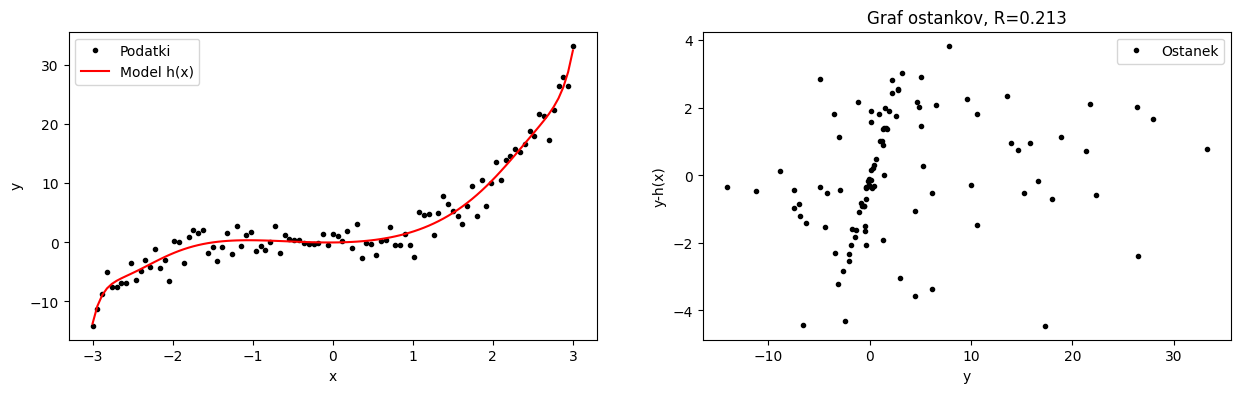

In [8]:
data = np.loadtxt("../data/sintetični/data_C.txt")
x    = data[:, [0]]
y    = data[:, [1]]

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

model = Ridge(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

X = scaler_x.inverse_transform(X)
y = scaler_y.inverse_transform(y)
hx = scaler_y.inverse_transform(hx.reshape(-1, 1))

plot_fit_residual(X[:, 1], y, hx)

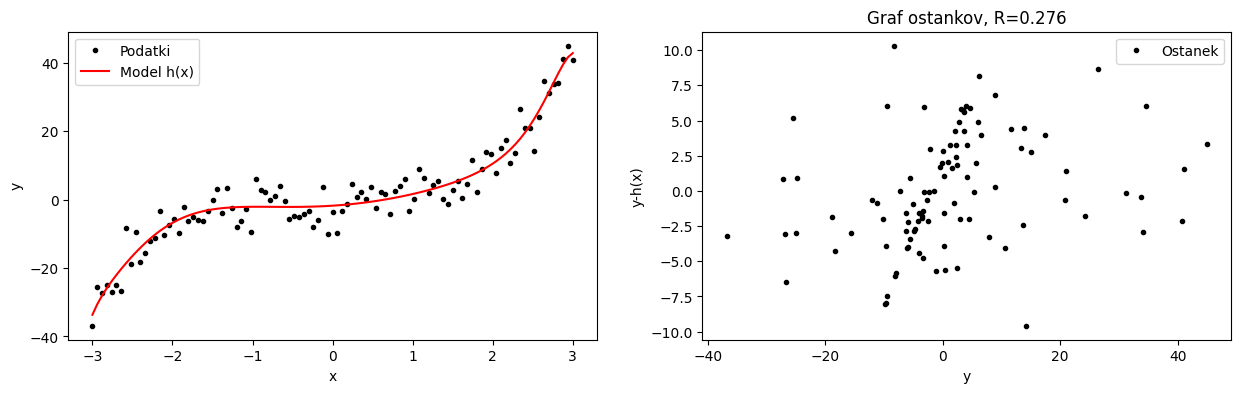

In [9]:
data = np.loadtxt("../data/sintetični/data_D.txt")
x    = data[:, [0]]
y    = data[:, [1]]

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

model = Ridge(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

X = scaler_x.inverse_transform(X)
y = scaler_y.inverse_transform(y)
hx = scaler_y.inverse_transform(hx.reshape(-1, 1))

plot_fit_residual(X[:, 1], y, hx)

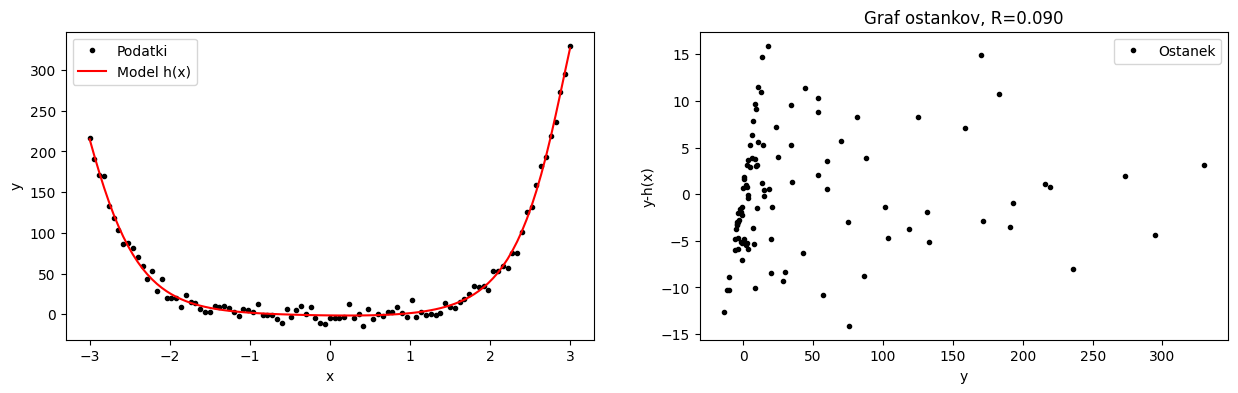

In [10]:
data = np.loadtxt("../data/sintetični/data_E.txt")
x    = data[:, [0]]
y    = data[:, [1]]

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

model = Ridge(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

X = scaler_x.inverse_transform(X)
y = scaler_y.inverse_transform(y)
hx = scaler_y.inverse_transform(hx.reshape(-1, 1))

plot_fit_residual(X[:, 1], y, hx)

##### Answer 6-1-5

In [11]:
import pickle
with open("../data/yelp_2000.pkl", "rb") as f:
    df = pickle.load(f)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["text"])
y = df["rating"]

In [12]:
ridge = Ridge(alpha=1.)
ridge.fit(X, y)

feature_names = np.array(vectorizer.get_feature_names_out())
coefs = ridge.coef_

top_positive = np.argsort(coefs)[-15:]
top_negative = np.argsort(coefs)[:15]

print("Positive words:\n", feature_names[top_positive])
print("\nNegative words:\n", feature_names[top_negative])

Positive words:
 ['island' 'dull' 'bruschetta' 'spacious' 'friendly service' 'gem' 'main'
 'just great' 'great customer' 'chai' 'lv' 'cheapest' 'period'
 'good stuff' 'dive']

Negative words:
 ['crap' 'yuck' 'rude' 'sucks' 'phone number' 'past years' 'lame' 'smells'
 'soooo' 'inconsistent' 'product' 'smells like' 'giant' 'salty' 'ruined']


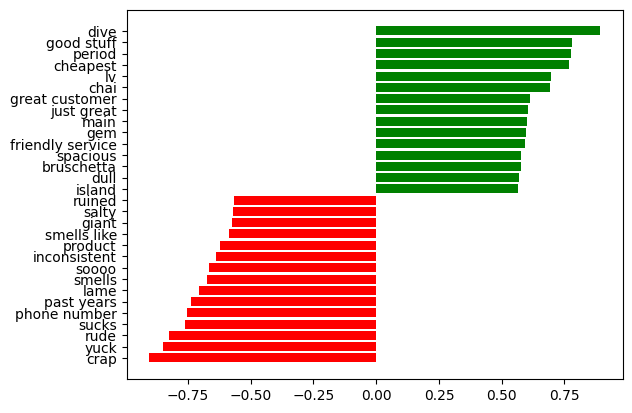

In [13]:
plt.barh(feature_names[top_negative], coefs[top_negative], color="red")
plt.barh(feature_names[top_positive], coefs[top_positive], color="green")
plt.show()

##### Answer 6-1-6

In [14]:
with open("../data/yelp_test.pkl", "rb") as f:
    df_test = pickle.load(f)

In [15]:
X_test = vectorizer.transform(df_test["text"])
y_test = df_test["rating"]

hx = ridge.predict(X_test)

mse = mean_squared_error(hx, y_test)
print("MSE: %.2f" % mse)
r2 = r2_score(y_test, hx)*100
print("R²: %.2f" % r2 + "%" )

MSE: 2.65
R²: -29.48%
